<a href="https://colab.research.google.com/github/yagmurmutlu/fetal_health/blob/main/fetal_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sun Dec 18 23:00:42 2022

@author: yagmur
"""

# Kütüphaneyi içe aktar
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



# veriyi içe aktar
data = pd.read_csv("fetal_health.csv") 


y = data["fetal_health"].values # sınıfları y değişkenin içerisine koyalım
x_data = data.drop(["fetal_health"],axis=1) # özellikleri x_data değişkenin içerisine koyalım


# normalizasyon
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

# eğitim test bölünmesi
from sklearn.model_selection import train_test_split
# % 15 test,  % 85 eğitim
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15,random_state=42)



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


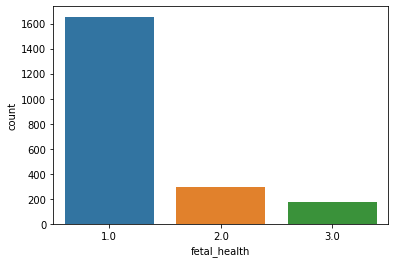

In [ ]:
sns.countplot(data["fetal_health"])
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
score_list = []
for each in range(1,50):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,50),score_list)
plt.xlabel("k değerleri")
plt.ylabel("Doğruluk")
plt.title("En iyi K Değerinin Bulunması")
plt.show()

from sklearn.model_selection import GridSearchCV

grid = {"n_neighbors":np.arange(1,50)} #50 k değeri için 
knn= KNeighborsClassifier()

knn_cv = GridSearchCV(knn, grid, cv = 10)  # GridSearchCV ,10 cross_fold
knn_cv.fit(x,y)

print("En iyi K değeri: ",knn_cv.best_params_)
print("En iyi K değerine göre en iyi doğruluk değeri: ",knn_cv.best_score_)

#%% confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = knn_cv.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm
# sıcaklık haritası
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="white",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


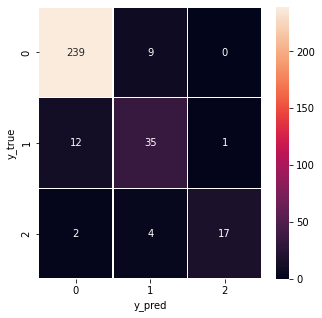

Destek Vektör Makinesi Modeli Test Doğruluk: 0.9122257053291536 


In [ ]:
#  Destek Vektör Makinesi içe aktar
from sklearn.svm import SVC
 
#  Destek Vektör Makinesi eğitimi
svm = SVC(random_state = 1)
svm.fit(x_train,y_train)

#%% confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = svm.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm
# sıcaklık haritası
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="white",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# testi
print("Destek Vektör Makinesi Modeli Test Doğruluk: {} ".format(svm.score(x_test,y_test)))



In [ ]:
#  Karar Ağacı içe aktar
from sklearn.tree import DecisionTreeClassifier

#Karar Ağacı eğitimi
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("Karar Ağacı Modeli Test Doğruluk: {} ".format(dt.score(x_test,y_test)))

#%% confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = dt.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm
# sıcaklık haritası
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="white",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()





Karar Ağacı Modeli Test Doğruluk: 0.9184952978056427 


Rastgele Orman Modeli Test Doğruluk: 0.9498432601880877 


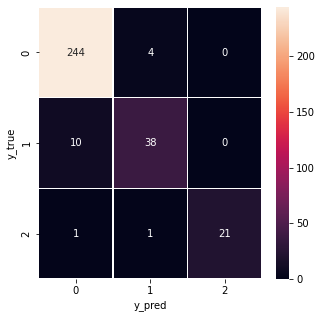

In [ ]:
#  Rastgele Orman içe aktar
from sklearn.ensemble import RandomForestClassifier

#Rastgele Orman eğitimi
rf = RandomForestClassifier(n_estimators = 100,random_state = 1) # 100 tane karar agacı içerir
rf.fit(x_train,y_train)

print("Rastgele Orman Modeli Test Doğruluk: {} ".format(rf.score(x_test,y_test)))

#%% confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm
# sıcaklık haritası
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="white",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


